# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.125455e+01     7.528551e+00
 * time: 0.002043008804321289
     1     2.870275e+01     6.071832e+00
 * time: 0.00814199447631836
     2     2.086244e+01     6.249965e+00
 * time: 0.015136003494262695
     3     1.659792e+01     6.574152e+00
 * time: 0.020142078399658203
     4     1.117481e+01     2.629125e+00
 * time: 0.025203943252563477
     5     9.498796e+00     1.117655e+00
 * time: 0.030766963958740234
     6     8.831078e+00     1.280945e+00
 * time: 0.03499007225036621
     7     8.527990e+00     7.411800e-01
 * time: 0.04044699668884277
     8     8.366172e+00     6.079305e-01
 * time: 0.04720711708068848
     9     8.325974e+00     9.997045e-01
 * time: 0.05217790603637695
    10     8.286835e+00     9.307039e-01
 * time: 0.05739092826843262
    11     8.215416e+00     6.177765e-01
 * time: 0.06367111206054688
    12     8.175988e+00     6.414796e-01
 * time: 0.06803393363952637
    13     8.124803e+00     4.892544e-01
 * 

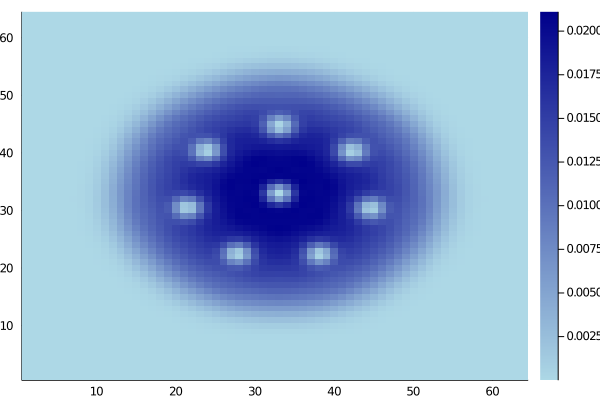

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)